In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from fbprophet.plot import add_changepoints_to_plot

In [2]:
import requests

POLONIEX_OHLCV_BASEURL = 'https://poloniex.com/public?command=returnChartData&currencyPair='

"""
https://poloniex.com/public?command=returnChartData&currencyPair=BTC_POT&start=1435699200&end=9999999999&period=14400

"""

def get_ohlcv_poloniex(pair='BTC_ETH', start=1435699200, end=9999999999, period=900):
    """
    returns ohlcv data for poloniex as pandas dataframe
    convert to unix timestamp using https://coderstoolbox.net/unixtimestamp/
    :param pair: str pair on poloniex
    :param start: int unix timestamp of beginning time
    :param end: int unix timestamp of ending time
    :param period: int candle width in seconds
    :return: pandas df of ohlcv data from poloniex for specified pair, times, and period
    """
    query = POLONIEX_OHLCV_BASEURL + pair + '&start=' + str(start) + '&end=' + str(end) + '&period=' + str(period)
    resp = requests.get(query,verify=False)

    if resp.status_code != 200:
        raise requests.ApiError('GET /tasks/ {}'.format(resp.status_code))

    return pd.DataFrame(resp.json())

In [3]:
df = get_ohlcv_poloniex(pair='USDT_BTC', start=1483600958, end=9999999999, period=900)
#no option to pass in 3600 sec candles
df = df[df.index % 4 == 0]
df['ds'] = pd.to_datetime(df['date'], unit='s')
df['y'] = df['weightedAverage']
df['logVolume'] = df['volume'].apply(np.log)

/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [4]:
df

,close,date,high,low,open,quoteVolume,volume,weightedAverage,ds,y,logVolume
0,1143.999999,1483601400,1145.000000,1135.000000,1137.020000,9.170638,10475.203351,1142.254643,2017-01-05 07:30:00,1142.254643,9.256766
4,1136.000000,1483605000,1136.000000,1124.018000,1124.500000,23.515077,26504.327610,1127.120601,2017-01-05 08:30:00,1127.120601,10.185063
8,1092.000000,1483608600,1099.232465,1055.291200,1085.000000,229.543299,247051.025497,1076.271998,2017-01-05 09:30:00,1076.271998,12.417350
12,1086.000000,1483612200,1111.000000,1085.000000,1096.000000,72.148022,79375.560627,1100.176535,2017-01-05 10:30:00,1100.176535,11.281946
16,1099.593509,1483615800,1100.000000,1087.000000,1087.000000,20.601704,22609.130935,1097.439857,2017-01-05 11:30:00,1097.439857,10.026109
20,1025.000000,1483619400,1073.460000,1022.300000,1070.238834,200.071762,209762.651118,1048.437066,2017-01-05 12:30:00,1048.437066,12.253732
24,940.000000,1483623000,990.000000,935.000000,973.000000,407.821379,394690.680904,967.802820,2017-01-05 13:30:00,967.802820,12.885858
28,952.890000,1483626600,968.000000,949.990000,953.000000,146.216273,139756.723942,955.821958,2017-01-05 14:30:00,955.821958,11.847659
32,993.337000,1483630200,993.337000,972.010001,983.337000,145.688098,143317.887496,983.730927,2017-01-05 15:30:00,983.730927,11.872820
36,953.360966,1483633800,973.060000,940.338000,973.060000,256.232347,244652.735669,954.808159,2017-01-05 16:30:00,954.808159,12.407595


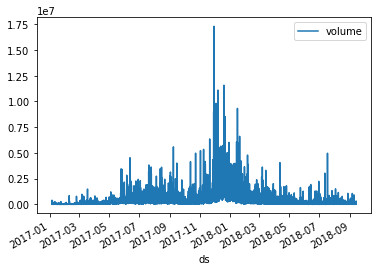

In [5]:
df.plot(x='ds', y ='volume')


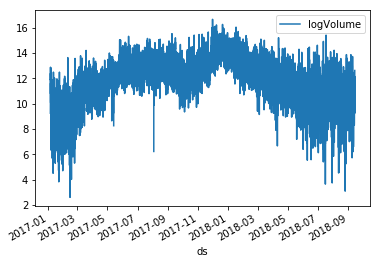

In [6]:
df.plot(x='ds', y ='logVolume')

# Start of Prophet Work

In [7]:
prophet = Prophet(seasonality_mode='multiplicative')
prophet.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [8]:
df.y.kurtosis()
#The kurtosis is less than 3, which means there are very few outliers than there are in a normal distribution

0.17642367861135755

In [9]:
df.y.skew()
#The skew is positive, which means that that the the graph is asymmetric, 
#with a longer right tail and the mass on the left side.

0.7203900804814173

# Creating Future and Forecast with 30 periods, then the volume is plotted with prophet

In [10]:
#Build future, periods set to 30 because there are 30 days of data
future = prophet.make_future_dataframe(periods=30)
#Build Forecast
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
14822,2018-10-09 19:30:00,5993.651910,4292.471001,7867.768305
14823,2018-10-10 19:30:00,5965.125275,4063.822904,8069.091275
14824,2018-10-11 19:30:00,5909.470131,3855.768202,8129.135509
14825,2018-10-12 19:30:00,5945.862902,3859.039291,8307.741804
14826,2018-10-13 19:30:00,5975.855386,3407.523156,8455.712723


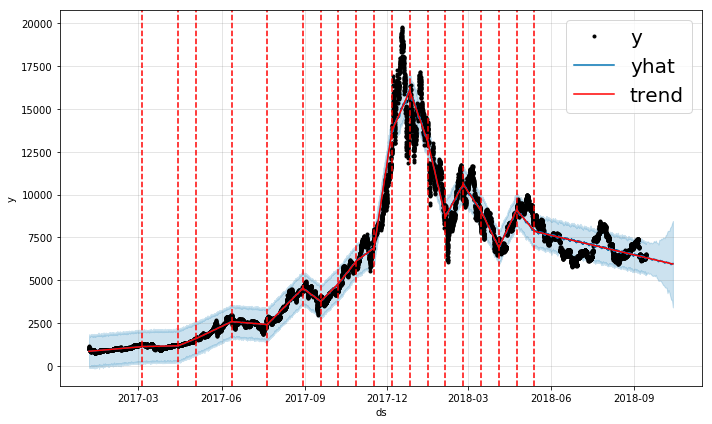

In [11]:
#Build the plot to show the forecasted data
bc_Volume = prophet.plot(forecast)
a = add_changepoints_to_plot(bc_Volume.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)


# Daily Forecasts by plotting prophet components future uncertainty

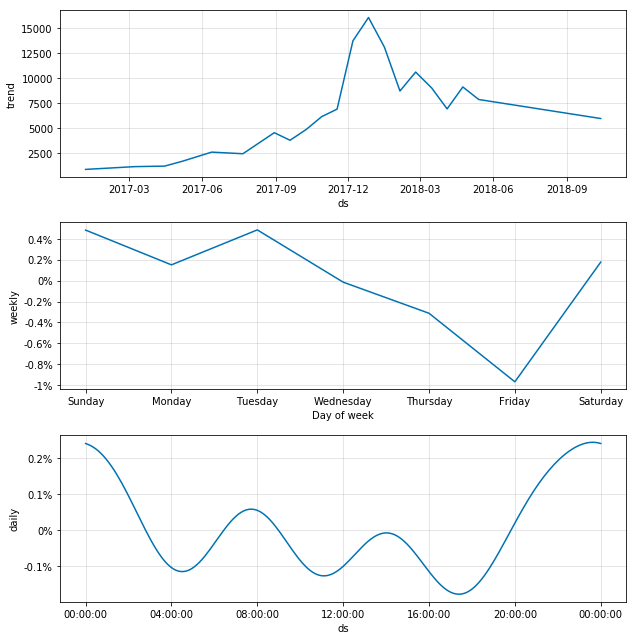

In [12]:
fig2 = prophet.plot_components(forecast,uncertainty=False)

# Build the prophet graph of volume data with a changepoint scale of .5; this makes the plotting more flexible

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


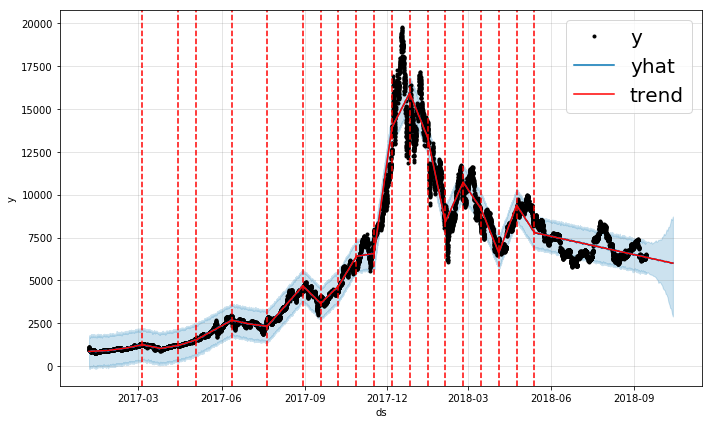

In [13]:
#Making the plotting more flexible (Alters the graph quite a bit, actually trends upwards instead of down)
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


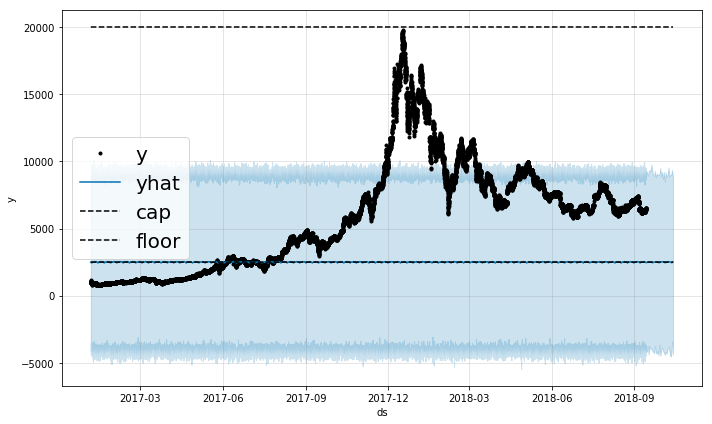

In [14]:
df['cap'] = 2500
df['floor'] = 20000
bc_Volume_Logistic = Prophet(growth = 'logistic')
bc_Volume_Logistic.fit(df)
future_logistic = bc_Volume_Logistic.make_future_dataframe(periods=30)
future_logistic['cap'] = 2500
future_logistic['floor'] = 20000
fcst_logistic = bc_Volume_Logistic.predict(future_logistic)
fig_logistic = bc_Volume_Logistic.plot(fcst_logistic)
plt.legend(loc='best', fontsize=20)

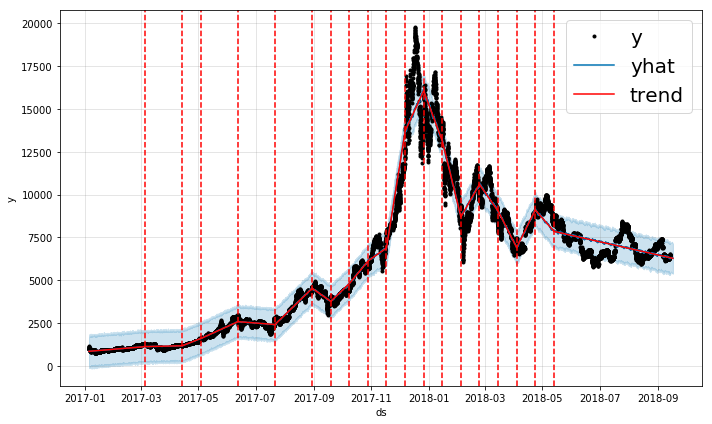

In [15]:
#Build future, periods set to 30 because there are 30 days of data
future = prophet.make_future_dataframe(periods=3)
#Build Forecast
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#Build the plot to show the forecasted data
bc_Volume = prophet.plot(forecast)
a = add_changepoints_to_plot(bc_Volume.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)

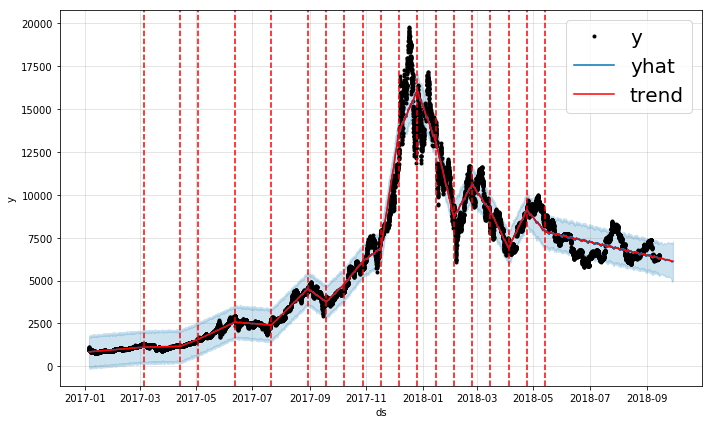

In [16]:
#Build future, periods set to 30 because there are 30 days of data
future = prophet.make_future_dataframe(periods=15)
#Build Forecast
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#Build the plot to show the forecasted data
bc_Volume = prophet.plot(forecast)
a = add_changepoints_to_plot(bc_Volume.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)

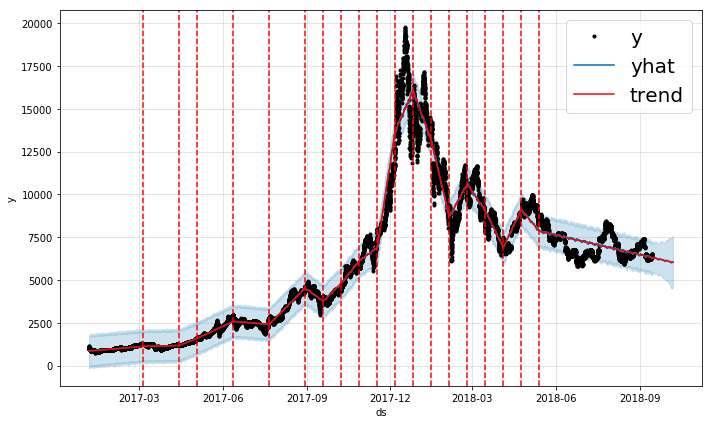

In [17]:
#Build future, periods set to 30 because there are 30 days of data
future = prophet.make_future_dataframe(periods=23)
#Build Forecast
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#Build the plot to show the forecasted data
bc_Volume = prophet.plot(forecast)
a = add_changepoints_to_plot(bc_Volume.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)

# Deeper Weekly Analysis (Novermber 2017 - March 2018)

In [18]:
df2 = df.loc[30000:40000]

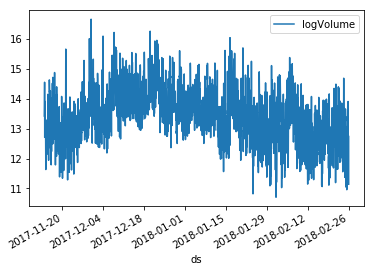

In [19]:
df2.plot(x='ds', y ='logVolume')

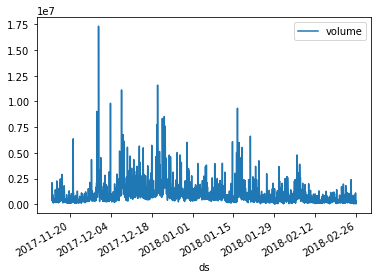

In [20]:
df2.plot(x='ds', y ='volume')

In [21]:
prophet = Prophet()
prophet.fit(df2)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [22]:
#Build future, periods set to 30 because there are 30 days of data
future = prophet.make_future_dataframe(periods=30)
#Build Forecast
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2526,2018-03-23 23:30:00,14764.726888,2967.152975,26181.494707
2527,2018-03-24 23:30:00,14964.158607,2770.844065,26842.581982
2528,2018-03-25 23:30:00,15067.350540,1977.409555,28104.724463
2529,2018-03-26 23:30:00,15215.418567,1209.573114,28733.510909
2530,2018-03-27 23:30:00,15198.841466,449.957170,29545.440102


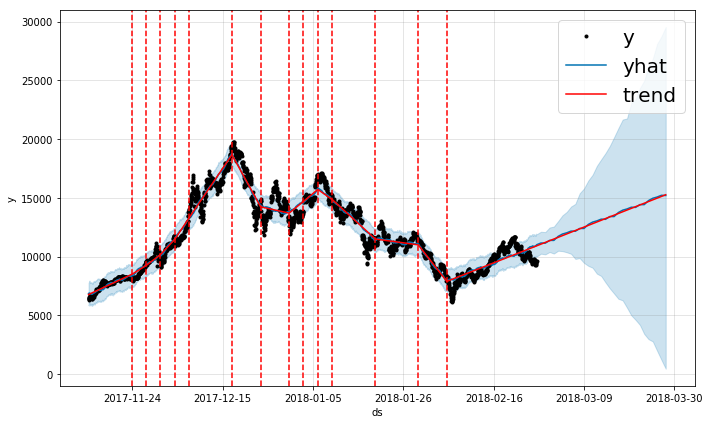

In [23]:
#Build the plot to show the forecasted data
bc_Volume = prophet.plot(forecast)
a = add_changepoints_to_plot(bc_Volume.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)


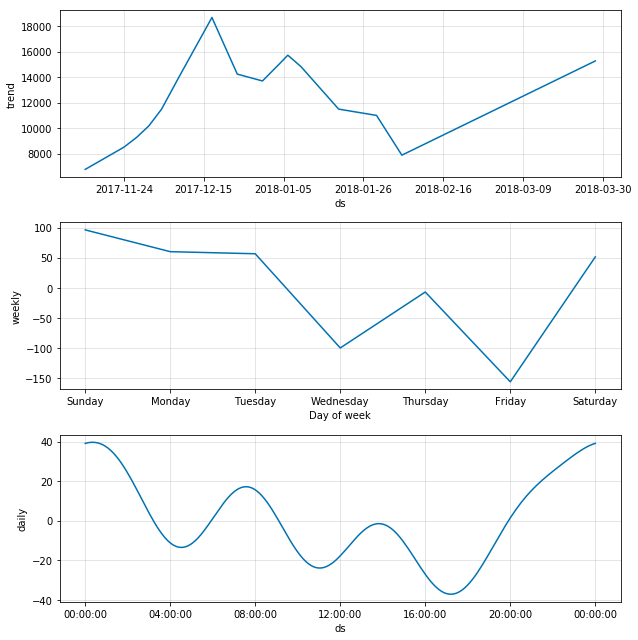

In [24]:
fig2 = prophet.plot_components(forecast,uncertainty=False)

# Deeper Weekly Analysis (June - October)

In [25]:
df = get_ohlcv_poloniex(pair='USDT_BTC', start=1483600958, end=9999999999, period=900)
#no option to pass in 3600 sec candles
df = df[df.index % 4 == 0]
df['ds'] = pd.to_datetime(df['date'], unit='s')
df['y'] = df['weightedAverage']
df['logVolume'] = df['volume'].apply(np.log)
df3 = df.loc[50000:60000]

/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


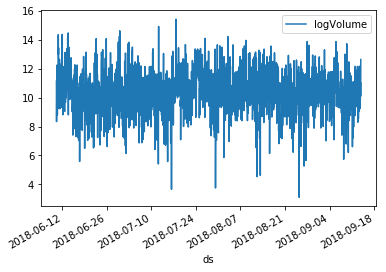

In [26]:
df3.plot(x='ds', y ='logVolume')

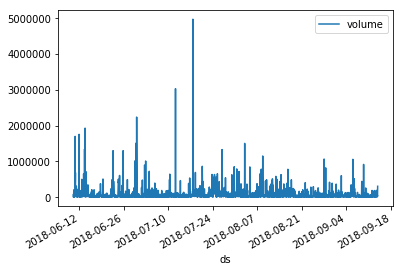

In [27]:
df3.plot(x='ds', y ='volume')

In [28]:
prophet = Prophet()
prophet.fit(df3)

#Build future, periods set to 30 because there are 30 days of data
future = prophet.make_future_dataframe(periods=30)
#Build Forecast
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2322,2018-10-09 19:30:00,5694.662290,1487.380162,9721.497663
2323,2018-10-10 19:30:00,5604.079111,1110.270604,9898.216391
2324,2018-10-11 19:30:00,5518.058311,864.465844,10053.064943
2325,2018-10-12 19:30:00,5459.851015,550.359835,10165.696981
2326,2018-10-13 19:30:00,5414.768913,266.363786,10384.152218


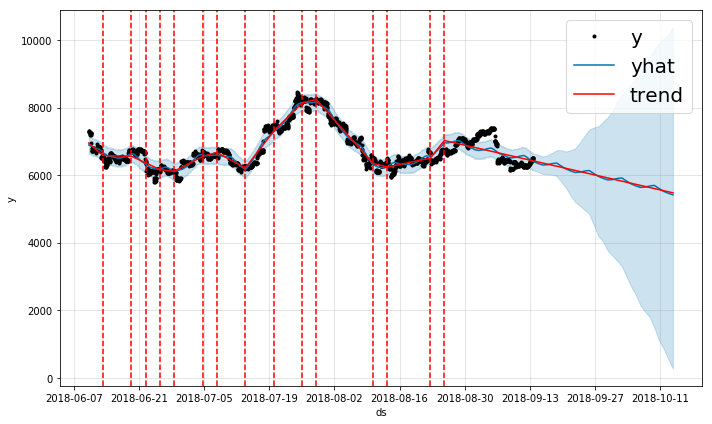

In [29]:
#Build the plot to show the forecasted data
bc_Volume = prophet.plot(forecast)
a = add_changepoints_to_plot(bc_Volume.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)


In [30]:
#Here we can see that the volume in the future may either increase greatly or decrease lately, 
#though the trend is a bit downlward.

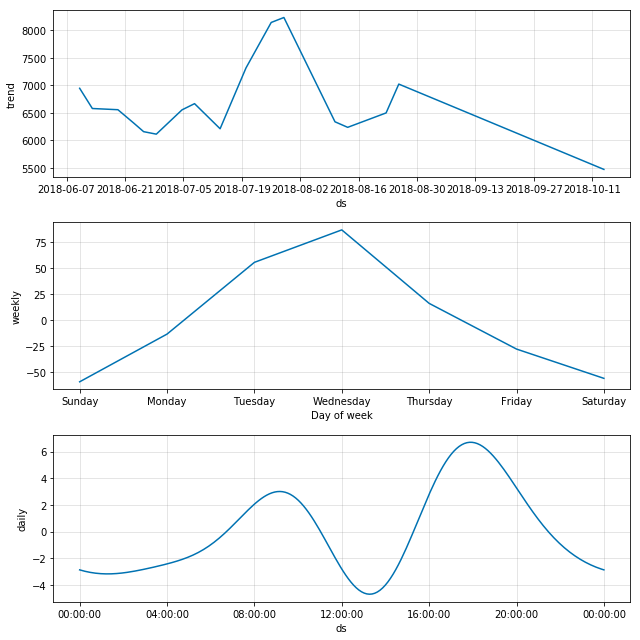

In [31]:
fig2 = prophet.plot_components(forecast,uncertainty=False)